# Basic Imports

In [7]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('../data/walkrun.csv')

In [9]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


# Complete Data Analysis Report (EDA) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [11]:
df.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [12]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [15]:
print(df.columns.tolist())

['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


## Drop/ignore non-predictor columns if they are irrelevant (date, time, username, wrist) 

In [16]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [17]:
non_predictors = ['date','time' , 'username', 'wrist']
df[non_predictors].head()

,date,time,username,wrist
0,2017-6-30,13:51:15:847724020,viktor,0
1,2017-6-30,13:51:16:246945023,viktor,0
2,2017-6-30,13:51:16:446233987,viktor,0
3,2017-6-30,13:51:16:646117985,viktor,0
4,2017-6-30,13:51:16:846738994,viktor,0


In [18]:
existing_non_predictors = [c for c in non_predictors if c in df.columns]
# keeps only those names from the exiexisting_non_predictors list that actually exist in the loaded DataFrame.

df[existing_non_predictors].head()

,date,time,username,wrist
0,2017-6-30,13:51:15:847724020,viktor,0
1,2017-6-30,13:51:16:246945023,viktor,0
2,2017-6-30,13:51:16:446233987,viktor,0
3,2017-6-30,13:51:16:646117985,viktor,0
4,2017-6-30,13:51:16:846738994,viktor,0


In [19]:
df_clean = df.drop(columns=existing_non_predictors, errors='ignore').copy()
df_clean.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [20]:
# Checking missing values
missing_counts = df_clean.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64


In [21]:
# If missing values are tiny in number -> drop rows, otherwise consider imputation.
total_missing = missing_counts.sum()
if total_missing == 0:
    print("No missing values found.")
else:
    print(f"Total missing values found: {total_missing}.")
    display(missing_counts[missing_counts > 0])

No missing values found.


In [22]:
# Confirming final shape after cleaning
print("After cleaning shape:", df_clean.shape)

After cleaning shape: (88588, 7)


### Activity balance check

In [23]:
df_clean.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [24]:
# Checking target distribution

# Checking if the required target column, 'activity', exists in the DataFrame 'df_clean'.
# If the column is missing, it raises a ValueError with an informative message.
if 'activity' not in df_clean.columns:
    raise ValueError("Target column 'activity' not found in data.")

# Calculating the frequency (count) of each unique value in the 'activity' column.
# This is a key step for understanding the distribution of the target variable.
activity_counts = df_clean['activity'].value_counts()

# Printing the resulting counts to the console for inspection.
# The output shows how many times each unique activity level appears in the dataset.
print("Activity value counts:\n", activity_counts)

Activity value counts:
 activity
1    44365
0    44223
Name: count, dtype: int64


- Activity class counts: {1: 44365, 0: 44223}. Percentages: {1: 50.08, 0: 49.92}.
- Class distribution is reasonably balanced.
- **Conclusion:** Use stratified split and consider class weighting if imbalance is strong.

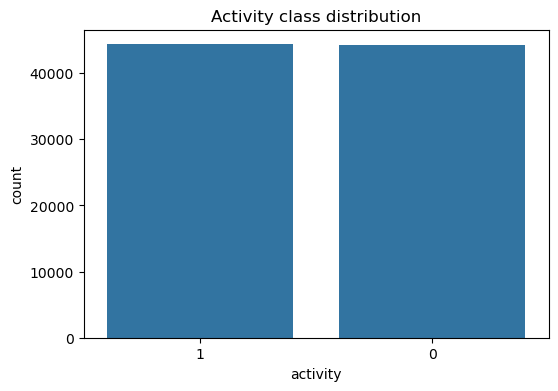

Activity percent distribution:
 activity
1    50.08
0    49.92
Name: count, dtype: float64


In [25]:
# loting Bar chart to for class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='activity', order=activity_counts.index)
plt.title("Activity class distribution")
plt.show()

# Percent distribution
print("Activity percent distribution:\n", (activity_counts / activity_counts.sum() * 100).round(2))

- Activity class counts: {1: 44365, 0: 44223}. Percentages: {1: 50.08, 0: 49.92}.
- Class distribution is reasonably balanced.
- **Conclusion:** Use stratified split and consider class weighting if imbalance is strong.

## UNIVARITE AND BIVARIATE ANALYSIS 

### Univariate analysis

For each sensor reading, compute descriptive statistics and to plot distributions to inspect range, central tendency, dispersion, and outliers.

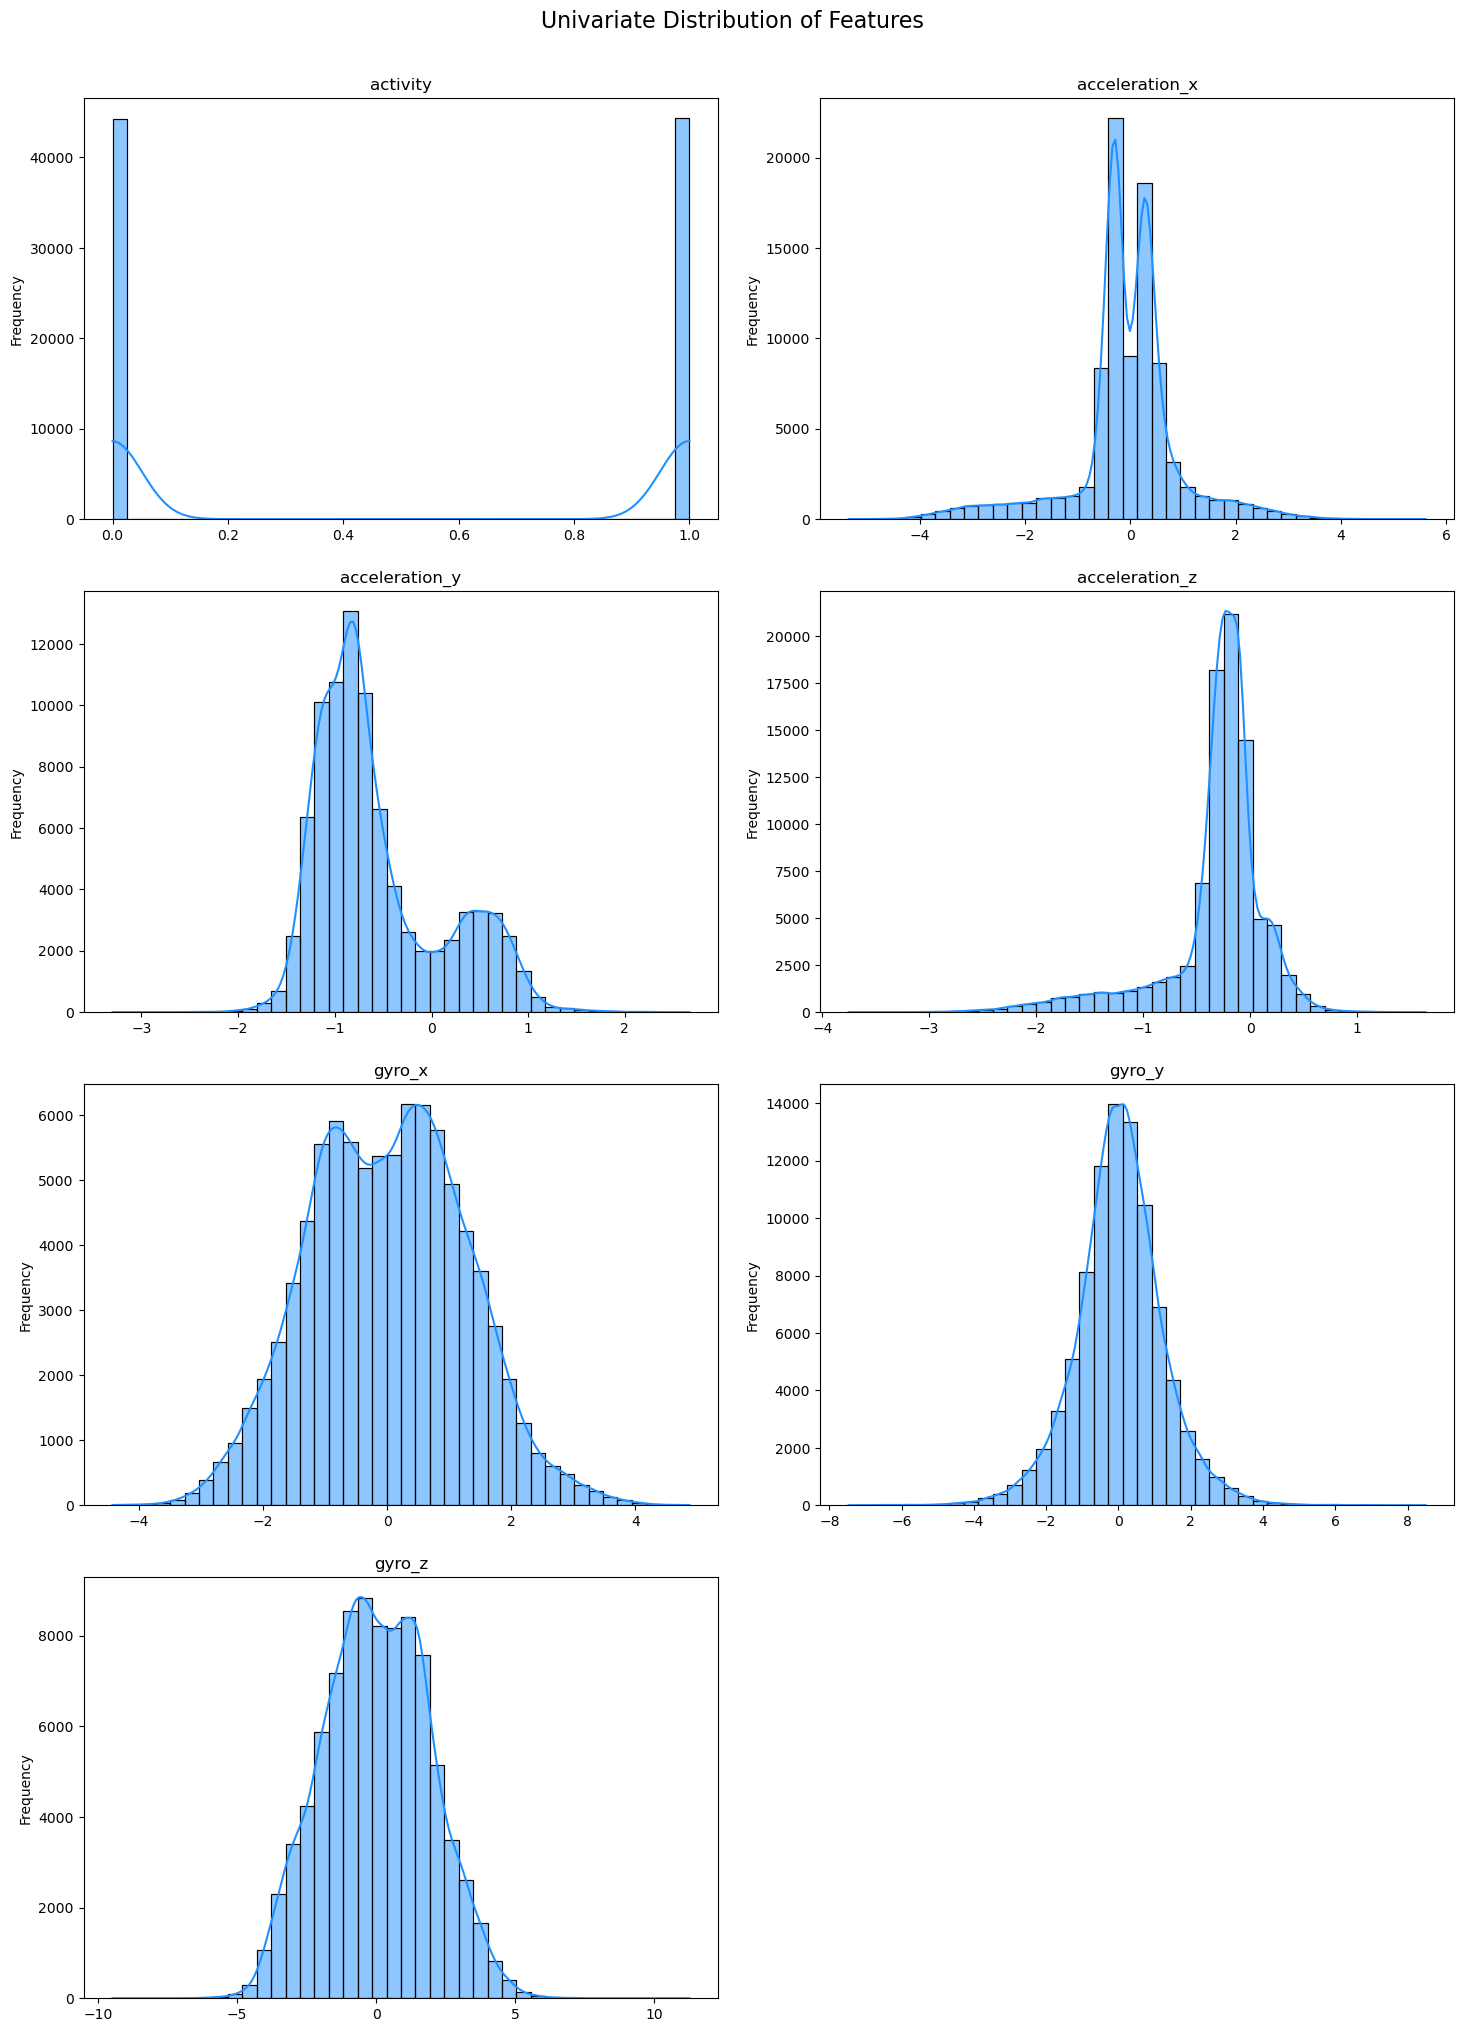

In [26]:
plt.figure(figsize = (15,20))

for i,col in enumerate(df_clean.columns,1):
    plt.subplot(4,2,i)
    sns.histplot(df_clean[col],bins=40, color='dodgerblue',edgecolor='black',kde = True,palette='Set2')
    plt.title(f"{col}", fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout(pad=2.0)
plt.suptitle('Univariate Distribution of Features', fontsize=16, y=1.02)
plt.show()

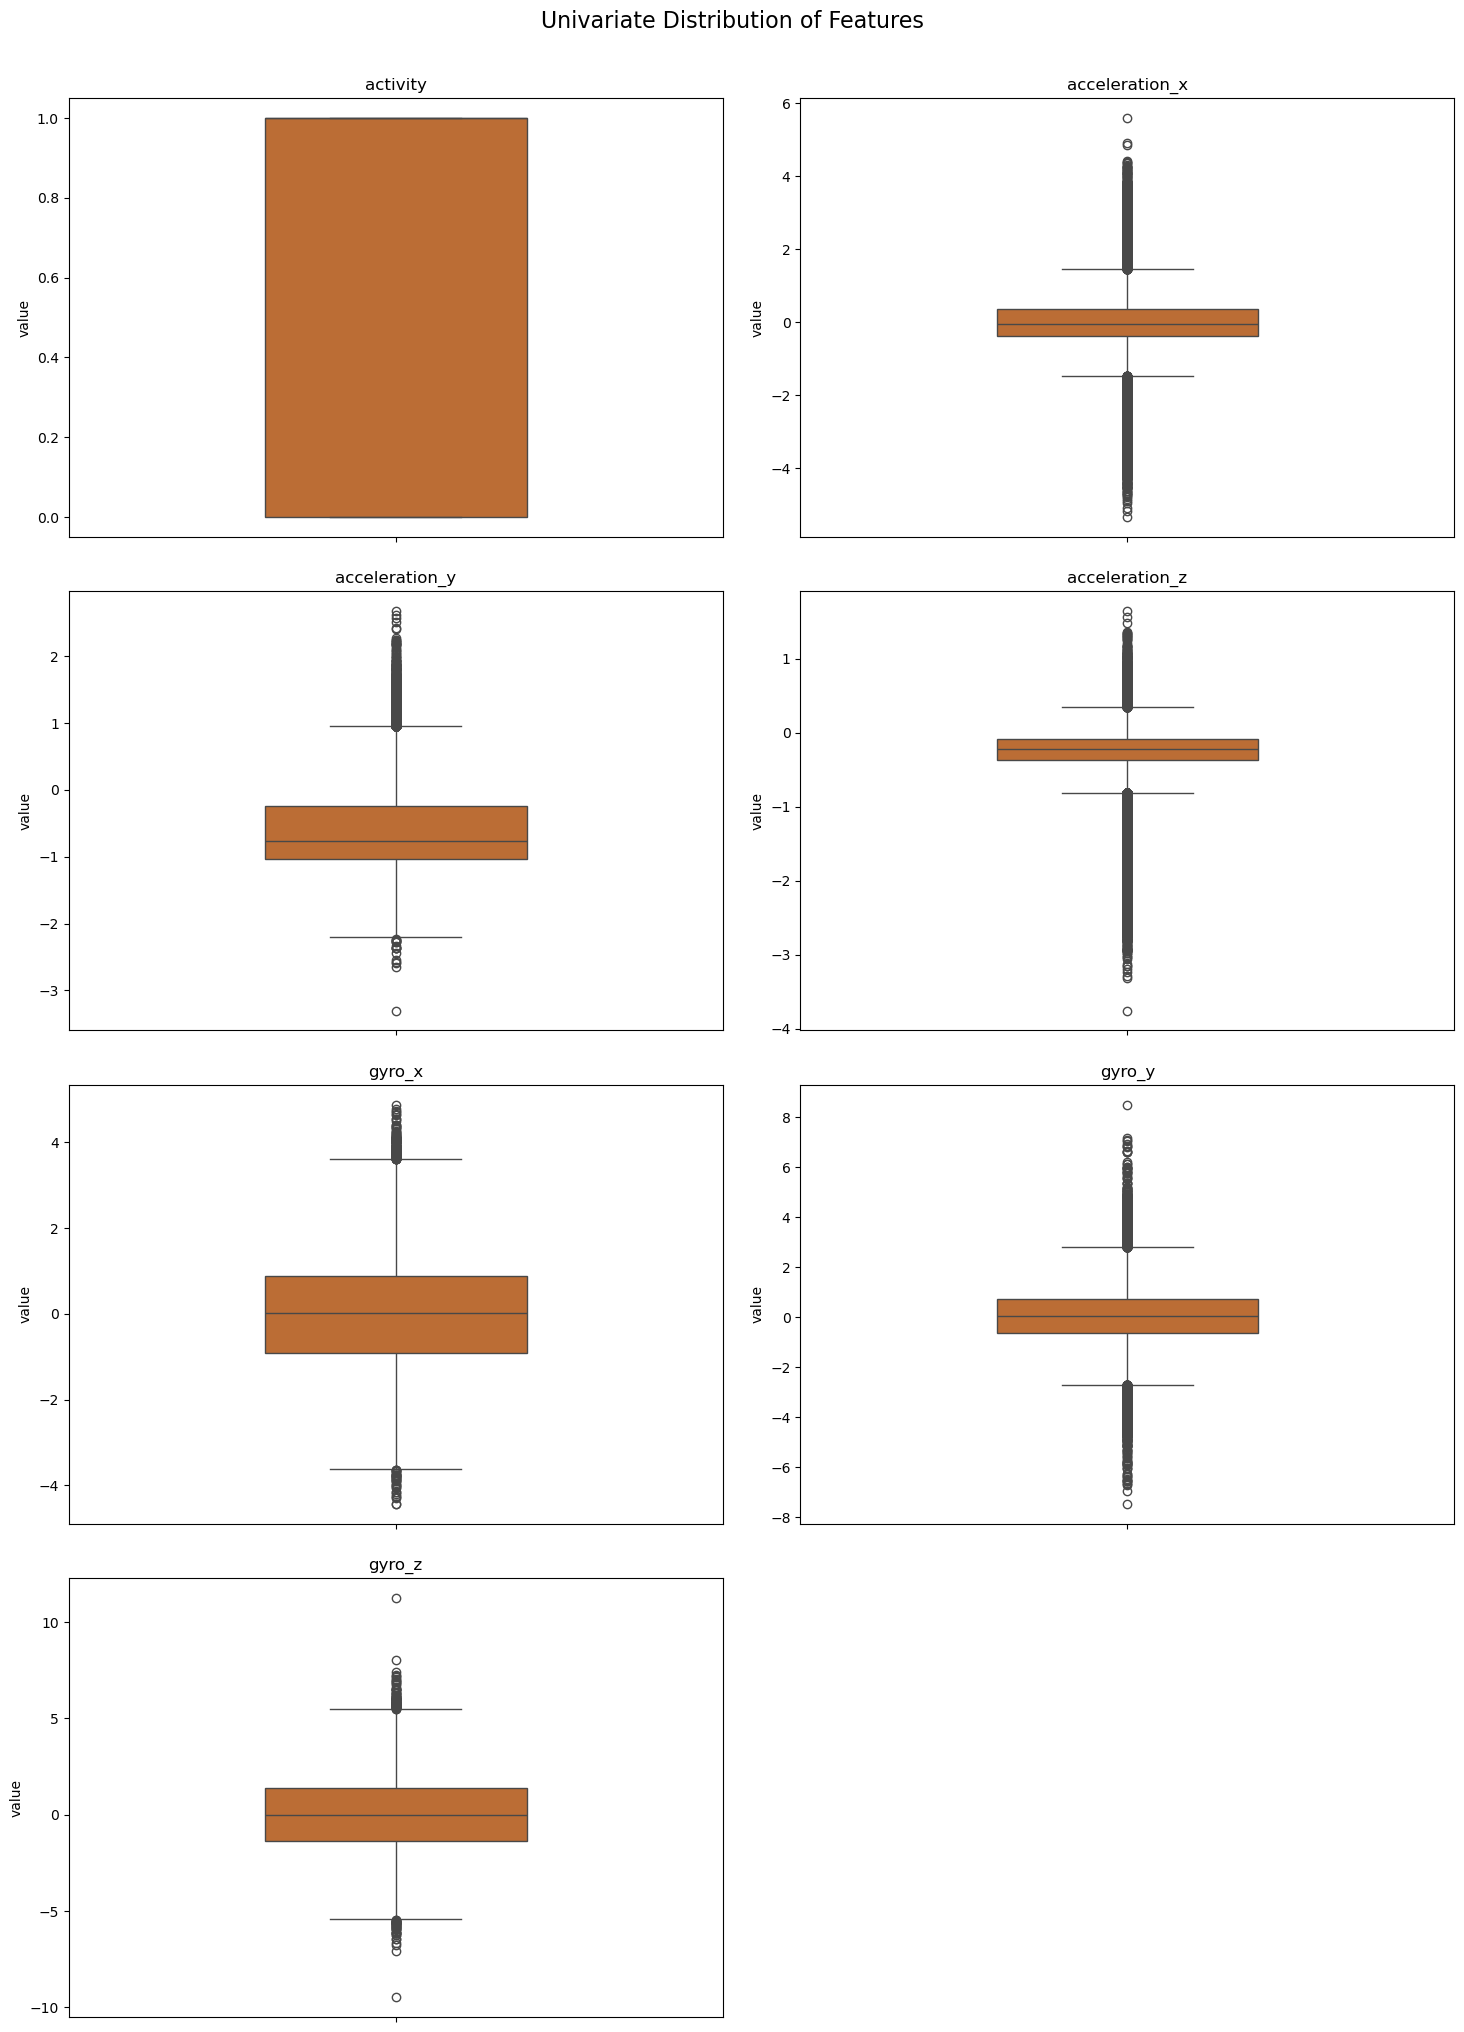

In [27]:
plt.figure(figsize = (15,20))

for i,col in enumerate(df_clean.columns,1):
    plt.subplot(4,2,i)
    sns.boxplot(df_clean[col],color = 'chocolate', width = 0.4)
    plt.title(f"{col}", fontsize=12)
    plt.xlabel('')
    plt.ylabel('value')

plt.tight_layout(pad=2.0)
plt.suptitle('Univariate Distribution of Features', fontsize=16, y=1.02)
plt.show()

### Bivariate Analysis

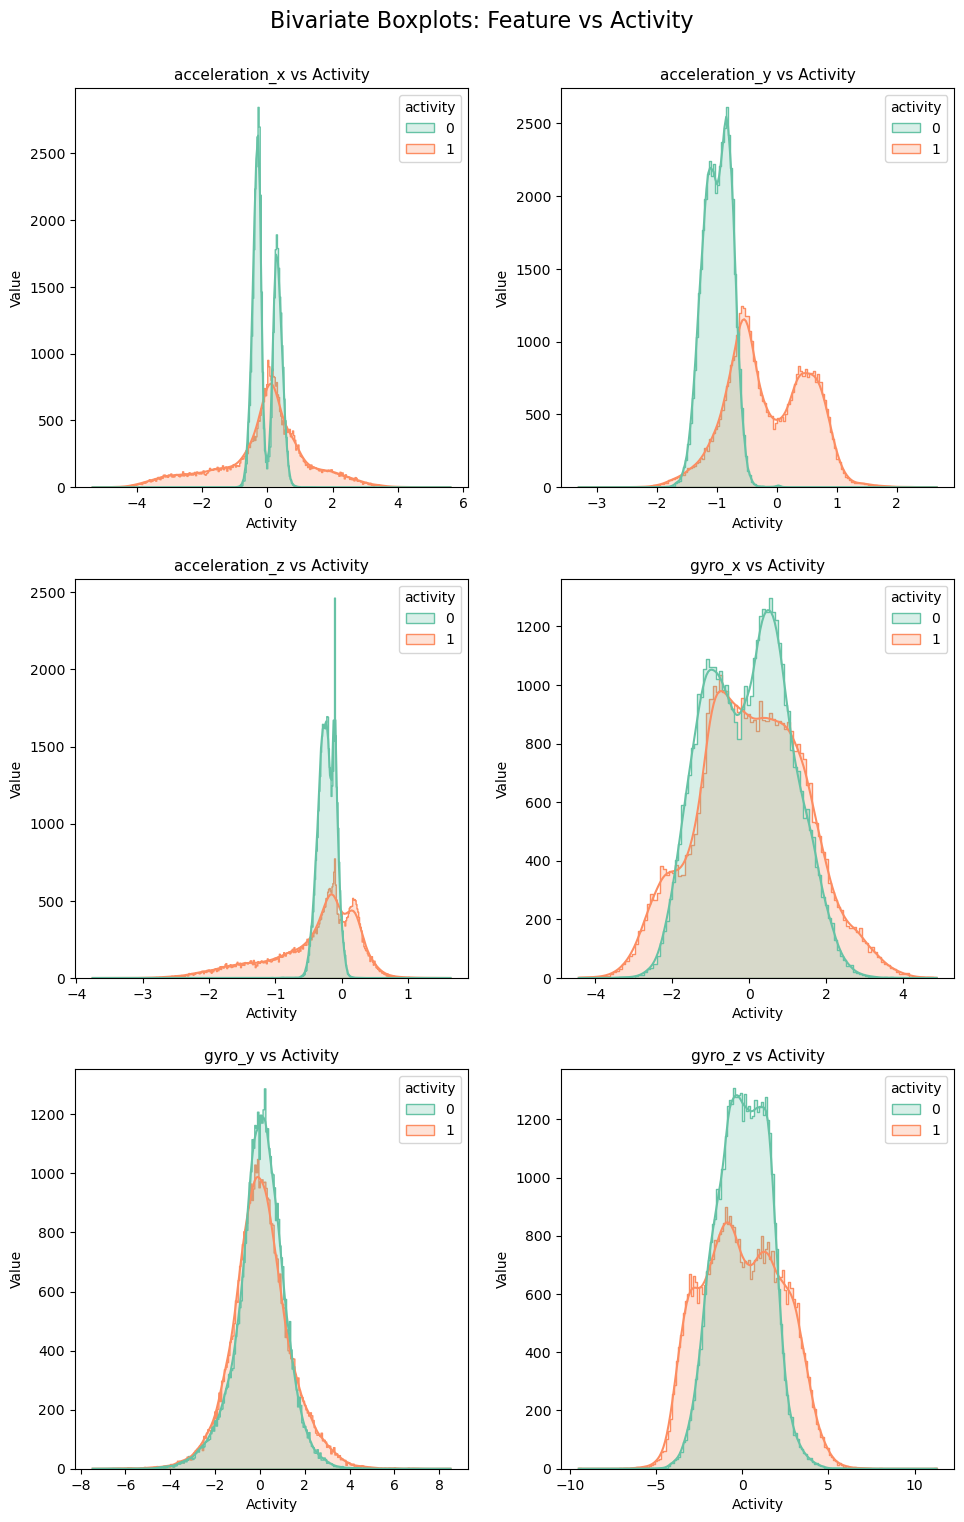

In [28]:
cols = ['acceleration_x','acceleration_y','acceleration_z',
        'gyro_x','gyro_y','gyro_z']

plt.figure(figsize=(10,15))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df_clean, x=col, hue='activity', kde=True, palette='Set2', element='step')
    plt.title(f'{col} vs Activity', fontsize=11)
    plt.xlabel('Activity')
    plt.ylabel('Value')

plt.tight_layout(pad=2.0)
plt.suptitle('Bivariate Boxplots: Feature vs Activity', fontsize=16, y=1.02)
plt.show()

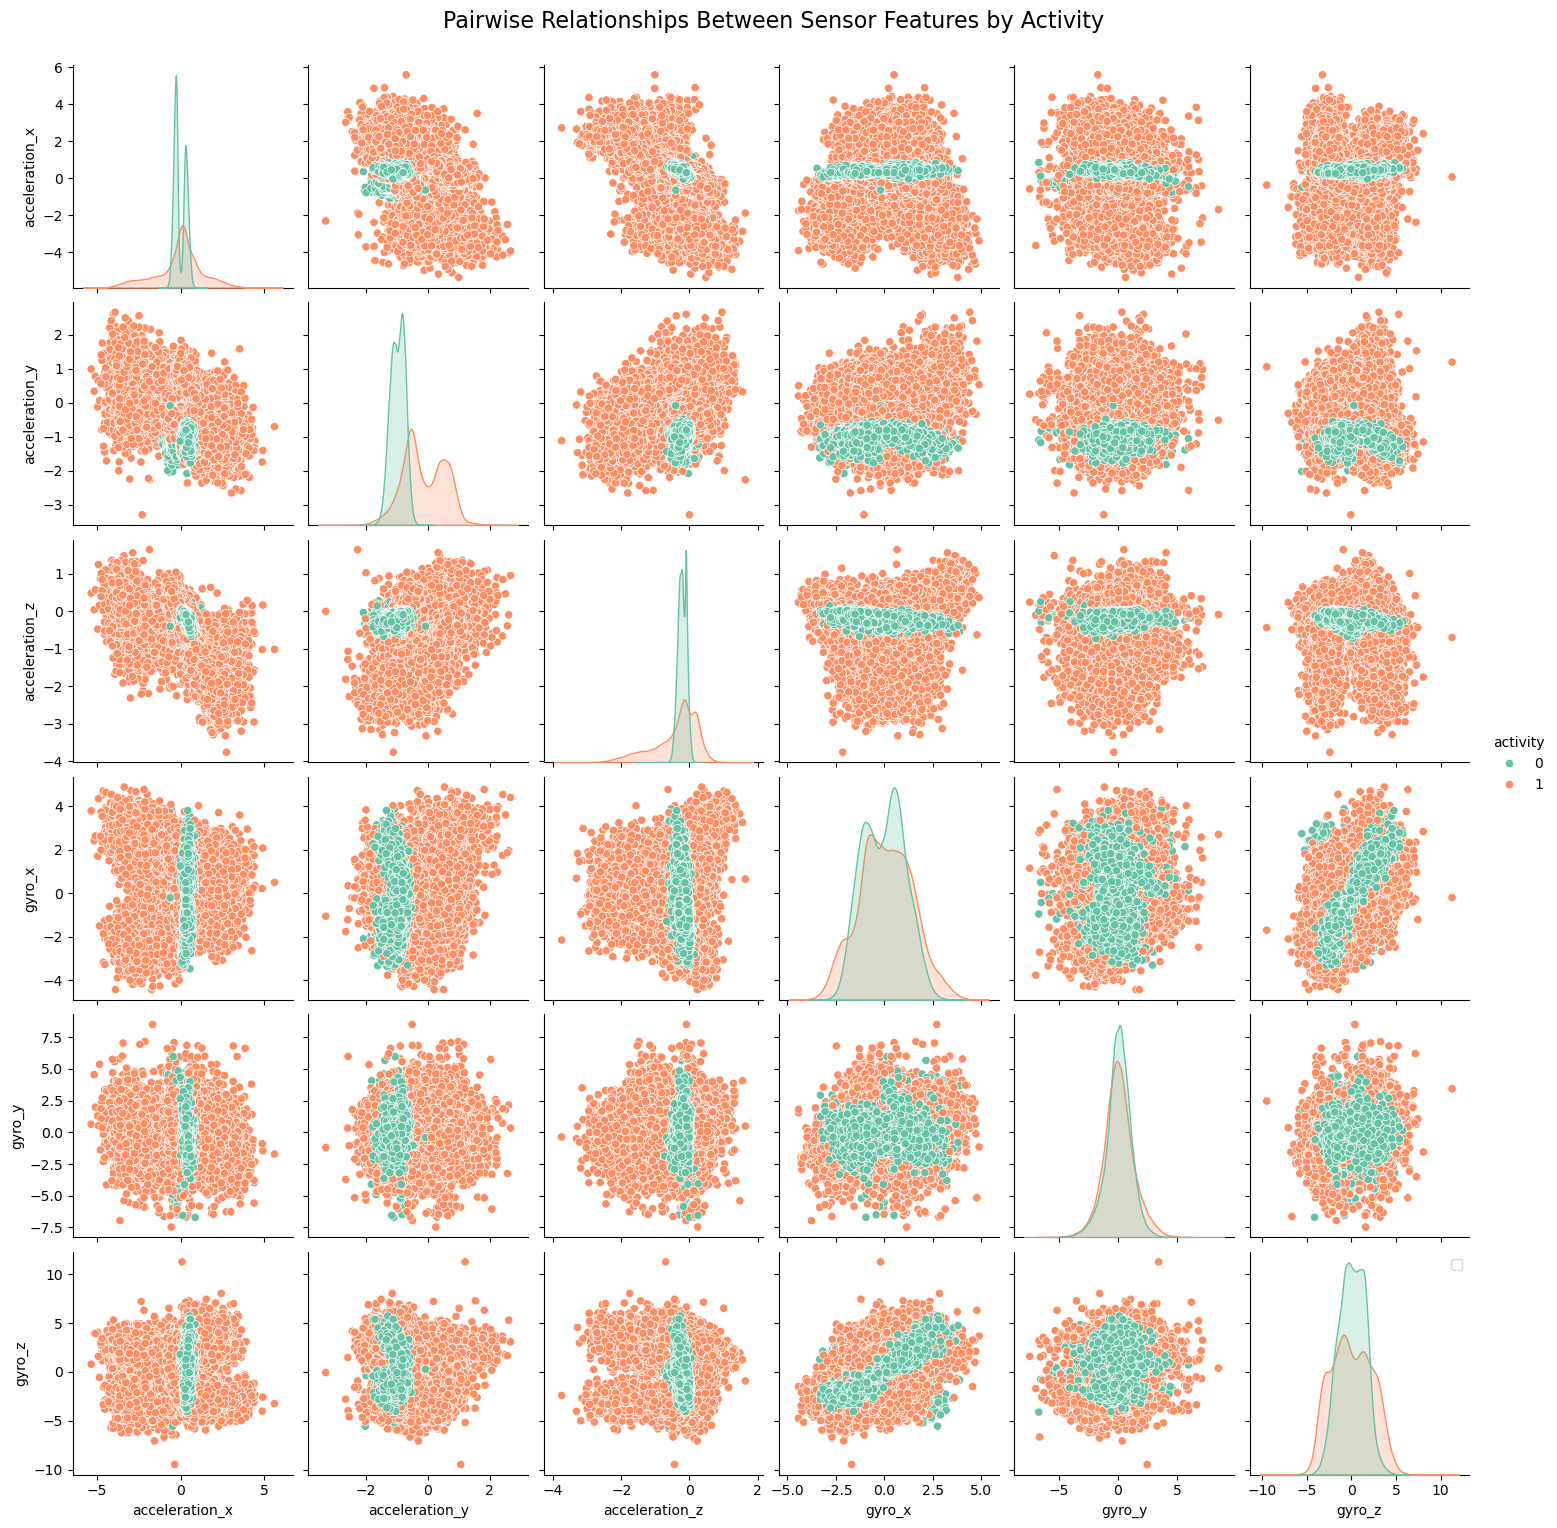

In [29]:
sns.pairplot(df_clean[cols + ['activity']], hue='activity', palette='Set2', diag_kind='kde')
plt.legend()

plt.suptitle('Pairwise Relationships Between Sensor Features by Activity', fontsize=16, y=1.02)
plt.show()

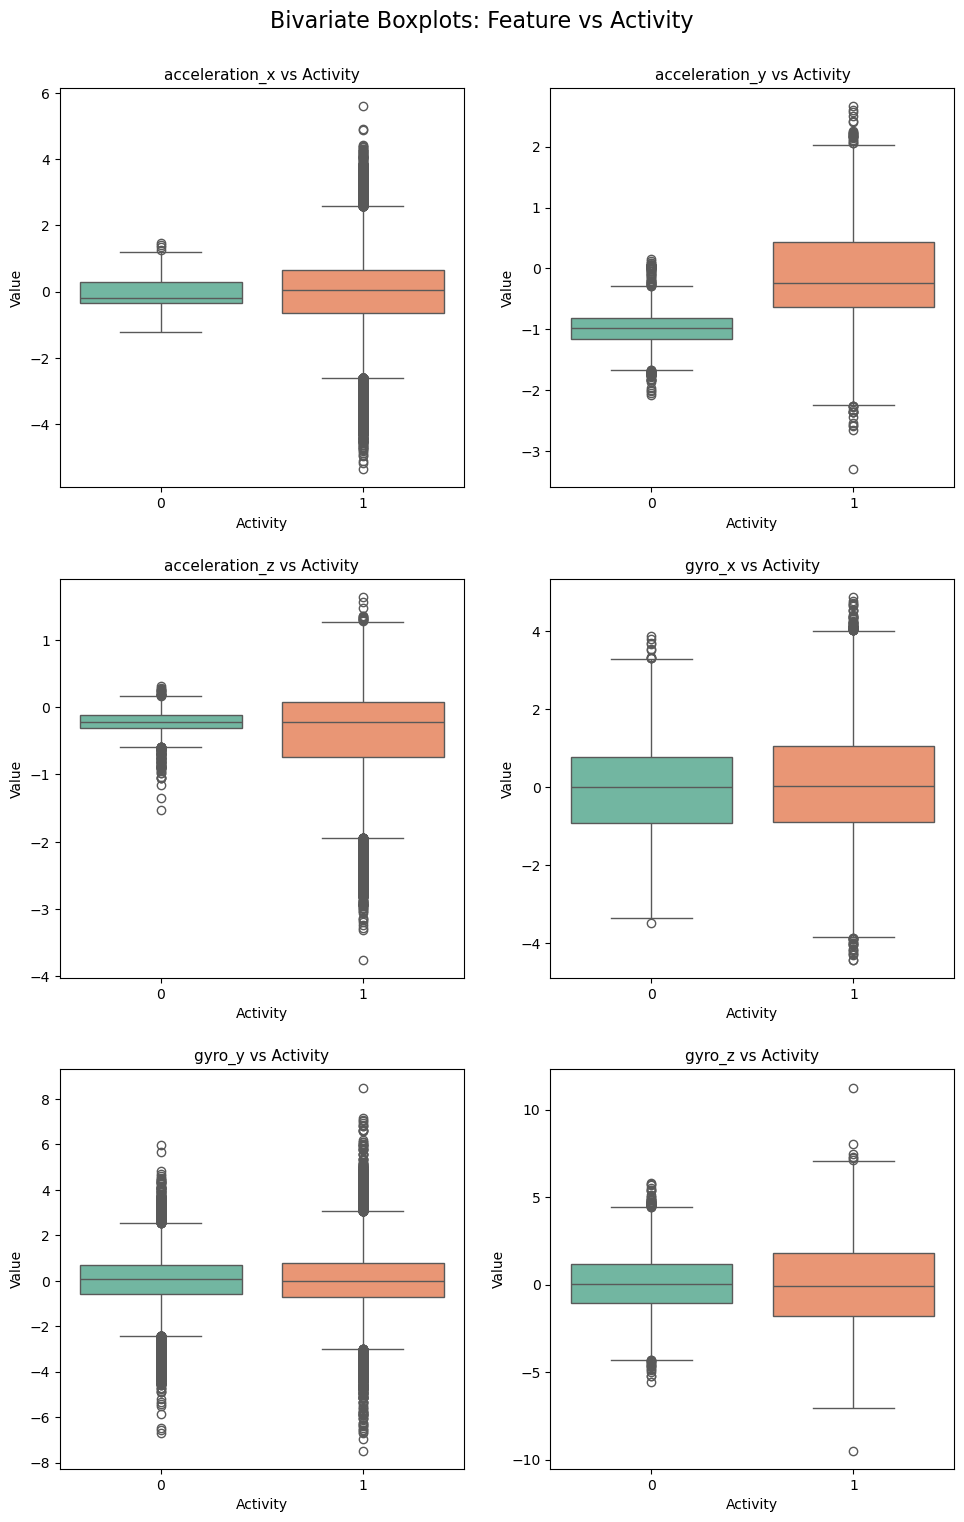

In [30]:
plt.figure(figsize=(10,15))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='activity', y=col, data=df_clean, palette='Set2')
    plt.title(f'{col} vs Activity', fontsize=11)
    plt.xlabel('Activity')
    plt.ylabel('Value')

plt.tight_layout(pad=2.0)
plt.suptitle('Bivariate Boxplots: Feature vs Activity', fontsize=16, y=1.02)
plt.show()

- If outliers are removed then the accuracy has been droping from 5 to 10 percentage. Hence outliers are ignored for better performace

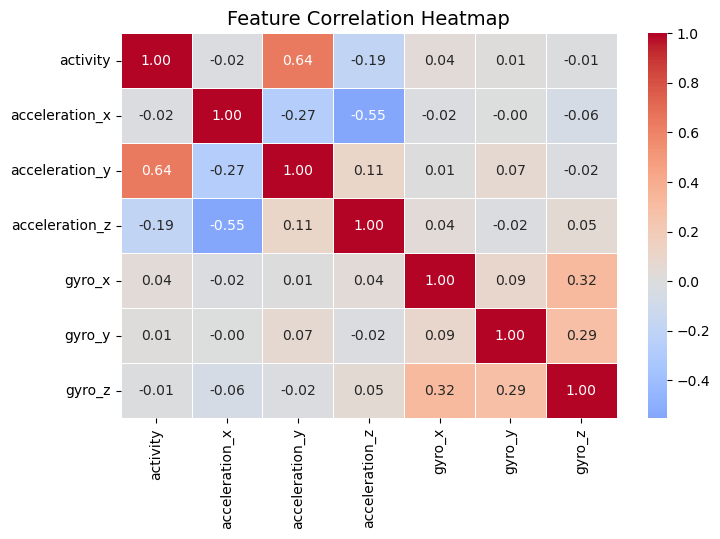

In [31]:
plt.figure(figsize = (8,5))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Feature Engineering & Preparation for Modeling

In [32]:
# Modeling + preprocessing + metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# Deep learning for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Feature Engineering

In [33]:
# Numeric columns (sensor data)
numeric_cols = ['acceleration_x','acceleration_y','acceleration_z',
                'gyro_x','gyro_y','gyro_z']
numeric_cols = [c for c in numeric_cols if c in df_clean.columns]

# Descriptive statistics (mean, median, std, min, max)
desc = df_clean[numeric_cols].agg(['mean','median','std','min','max']).T
display(desc)

,mean,median,std,min,max
acceleration_x,-0.074811,-0.0595,1.009299,-5.3505,5.6033
acceleration_y,-0.562585,-0.7591,0.658458,-3.2990,2.6680
acceleration_z,-0.313956,-0.2210,0.486815,-3.7538,1.6403
gyro_x,0.004160,0.0187,1.253423,-4.4306,4.8742
gyro_y,0.037203,0.0393,1.198725,-7.4647,8.4980
gyro_z,0.022327,0.0069,1.914423,-9.4800,11.2662


In [34]:
# Create overall magnitudes for acceleration and gyro
df_model = df_clean.copy()
if all(c in df_model.columns for c in ['acceleration_x','acceleration_y','acceleration_z']):
    df_model['accel_mag'] = np.sqrt(
        df_model['acceleration_x']**2 + df_model['acceleration_y']**2 + df_model['acceleration_z']**2
    )
if all(c in df_model.columns for c in ['gyro_x','gyro_y','gyro_z']):
    df_model['gyro_mag'] = np.sqrt(
        df_model['gyro_x']**2 + df_model['gyro_y']**2 + df_model['gyro_z']**2
    )

# show new columns
print("New columns:", [c for c in df_model.columns if c not in df_clean.columns])
display(df_model.head())

New columns: ['accel_mag', 'gyro_mag']


,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,accel_mag,gyro_mag
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148,2.930374
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887,0.217731
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307,2.603424
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729,2.964524
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889,2.530928


## Train/test split

In [35]:
# Select features (use raw sensors + magnitudes)
feature_cols = [c for c in numeric_cols if c in df_model.columns] + \
               [c for c in ['accel_mag','gyro_mag'] if c in df_model.columns]
feature_cols = list(dict.fromkeys(feature_cols))  # preserve order, remove duplicates

X = df_model[feature_cols].values
y = df_model['activity'].values

# Stratified split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (70870, 8) Test shape: (17718, 8)


## Feature scaling

In [36]:
# Standard scaling (mean=0, std=1) — fit on train only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Quick check
print("Scaled train mean (per feature):", X_train_scaled.mean(axis=0).round(3))
print("Scaled train std (per feature):", X_train_scaled.std(axis=0).round(3))


Scaled train mean (per feature): [ 0.  0.  0. -0.  0. -0. -0.  0.]
Scaled train std (per feature): [1. 1. 1. 1. 1. 1. 1. 1.]


# Predictive Model Creation & Model Comparison

## Logistic Regression

In [37]:
# Fit logistic regression
log_clf = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight in case of imbalance
log_clf.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [38]:
# Predictions and probabilities
y_pred_lr = log_clf.predict(X_test_scaled)
y_proba_lr = log_clf.predict_proba(X_test_scaled)[:,1]

# Metrics
metrics_lr = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'auc': roc_auc_score(y_test, y_proba_lr)
}
print("Logistic Regression metrics:", metrics_lr)



Logistic Regression metrics: {'accuracy': 0.9525341460661474, 'precision': 0.9687208216619981, 'recall': 0.9354220669446636, 'f1': 0.9517802878275329, 'auc': 0.9900200282397098}


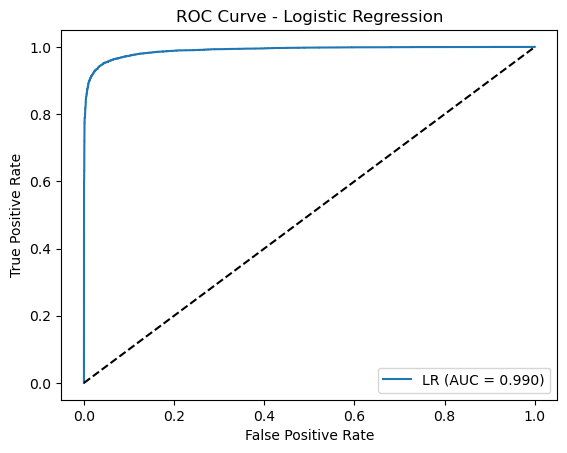

In [39]:
# ROC curve plot
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.figure()
plt.plot(fpr, tpr, label=f'LR (AUC = {metrics_lr["auc"]:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


# Check For Over Fitting 

In [40]:
y_pred_train_log = log_clf.predict(X_train_scaled)
y_pred_test_log = log_clf.predict(X_test_scaled)

# --- Evaluate accuracy ---
train_acc_log = accuracy_score(y_train, y_pred_train_log)
test_acc_log = accuracy_score(y_test, y_pred_test_log)

print(f"Training Accuracy: {train_acc_log:.4f}")
print(f"Testing Accuracy: {test_acc_log:.4f}")

# --- Check for overfitting ---
if train_acc_log - test_acc_log > 0.1:
    print("Possible Overfitting: Model performs much better on training data.")
else:
    print("No major overfitting detected.")

Training Accuracy: 0.9539
Testing Accuracy: 0.9525
No major overfitting detected.


This logistic regression model performed exceptionally well on the test set, especially when class_weight='balanced' was used to account for potential data imbalance.
- High Performance: All primary metrics (Accuracy, Precision, Recall, F1_score) are in the mid-90% range, suggesting the model is both accurate overall and effective at classifying both positive and negative instances.
- Excellent Discrimination: The AUC of $0.990$ and the shape of the ROC curve strongly indicate that the model has outstanding power to discriminate between the two classes.
- Well-Balanced: The relatively close values of Precision ($\approx 96.9\%$) and Recall ($\approx 93.5\%$), together with a high F1-Score ($\approx 95.2\%$), suggest that the class_weight='balanced' setting successfully helped the model avoid skewing its predictions towards the majority class, achieving a good balance in performance.

Summary, the results suggest that Logistic Regression is a highly suitable and effective model for this classification task.

## Random Forest Classifier

In [41]:
# Fit Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_clf.fit(X_train_scaled, y_train)  # RandomForest handles raw (unscaled) features well but scaling doesn't hurt


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [42]:
# Predictions and probabilities
y_pred_rf = rf_clf.predict(X_test_scaled)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:,1]

metrics_rf = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'auc': roc_auc_score(y_test, y_proba_rf)
}
print("Random Forest metrics:", metrics_rf)



Random Forest metrics: {'accuracy': 0.9884298453550062, 'precision': 0.9907155797101449, 'recall': 0.9861377211766031, 'f1': 0.9884213499011578, 'auc': 0.9991506871953628}


acceleration_y    0.455777
acceleration_z    0.209083
acceleration_x    0.108309
accel_mag         0.105605
gyro_z            0.045269
gyro_mag          0.039792
gyro_x            0.024384
gyro_y            0.011781
dtype: float64

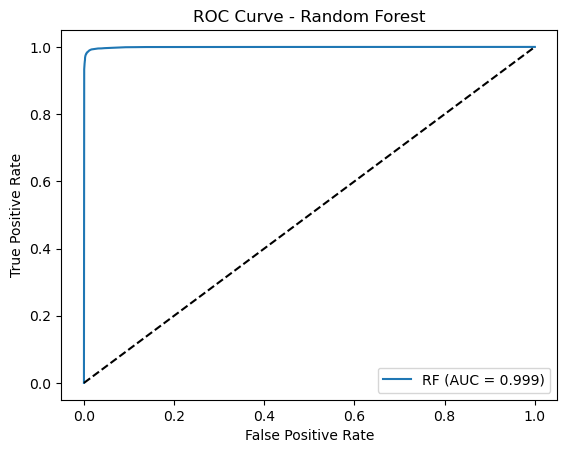

In [43]:
# Feature importance quick view
feat_importances = pd.Series(rf_clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
display(feat_importances)

# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {metrics_rf["auc"]:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


# Check For Over Fitting

In [44]:
y_pred_train_rf = rf_clf.predict(X_train_scaled)
y_pred_test_rf = rf_clf.predict(X_test_scaled)

# --- Evaluate accuracy ---
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {train_acc_rf:.4f}")
print(f"Testing Accuracy: {test_acc_rf:.4f}")

# --- Check for overfitting ---
if train_acc_rf - test_acc_rf > 0.1:
    print("Possible Overfitting: Model performs much better on training data.")
else:
    print("No major overfitting detected.")

Training Accuracy: 1.0000
Testing Accuracy: 0.9884
No major overfitting detected.


This Random Forest Classifier outperformed the previous Logistic Regression model, with an AUC of $\approx 0.990$.

- Exceptional Performance: All evaluation metrics are above $98.5\%$, and the AUC of $\approx 0.999$ is remarkable, demonstrating the model's robust predictive power and generalization capability.
- Effective Imbalance Handling: The high Recall and balanced performance metrics confirm that the class_weight='balanced' setting successfully mitigated any potential issues from class imbalance.
- Key Feature Insight: The model identifies the acceleration features, particularly 'acceleration_y', as the overwhelming drivers of the classification, providing a clear path for feature engineering or domain analysis.

**Summary**, this Random Forest model is an extremely effective and reliable classifier for this specific dataset.

## LSTM Deep Learning Model

In [45]:
# Ensure sequential split (no shuffle, no stratify)
# Keep original order to preserve time dependency
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# ------------------------------------------------------------
#  Feature scaling (fit only on training set)
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Prepare data for LSTM (3D shape: [samples, timesteps, features])
# We'll use TimeseriesGenerator to create simple sequences (window=10 readings)
sequence_length = 10

train_gen = TimeseriesGenerator(X_train_scaled, y_train, length=sequence_length, batch_size=32)
test_gen = TimeseriesGenerator(X_test_scaled, y_test, length=sequence_length, batch_size=32)



In [47]:
# Build LSTM model
lstm = Sequential([
    LSTM(64, input_shape=(sequence_length, X_train_scaled.shape[1]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [48]:
# Early stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = lstm.fit(train_gen, validation_data=test_gen, epochs=20, callbacks=[es], verbose=1)



Epoch 1/20
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9895 - loss: 0.0606 - val_accuracy: 0.9983 - val_loss: 0.0092
Epoch 2/20
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9986 - loss: 0.0081 - val_accuracy: 0.9986 - val_loss: 0.0080
Epoch 3/20
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9987 - loss: 0.0074 - val_accuracy: 0.9989 - val_loss: 0.0071
Epoch 4/20
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9988 - loss: 0.0083 - val_accuracy: 0.9982 - val_loss: 0.0093
Epoch 5/20
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.9989 - val_loss: 0.0068
Epoch 6/20
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9984 - val_loss: 0.0097
Epoch 7/20
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9993 - loss: 0.0050 - val_accuracy: 0.9988 - val_loss: 0.0070
Epoch 8/20
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9993 - loss: 0.00

In [49]:
def evaluate(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba)
    }

y_proba_lstm = lstm.predict(test_gen).ravel()
y_pred_lstm = (y_proba_lstm >= 0.5).astype(int)

lstm_metrics = evaluate(y_test[sequence_length:], y_pred_lstm, y_proba_lstm)
print(lstm_metrics)

554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
{'Accuracy': 0.9989270386266095, 'Precision': 0.998941281863344, 'Recall': 0.9995110821382008, 'F1': 0.9992261007698261, 'AUC': 0.9995660659104929}


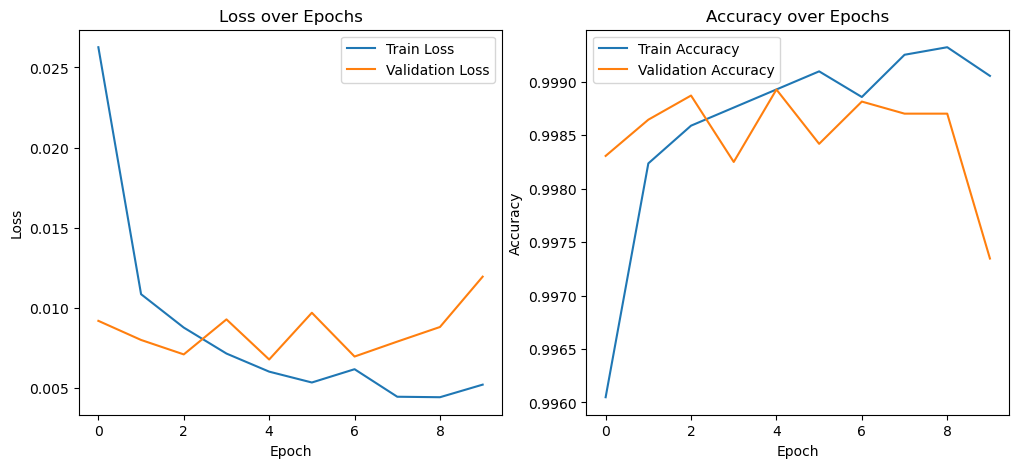

In [50]:

plt.figure(figsize=(12,5))

# Plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [51]:
# ===================================
# SIMPLE AUTOMATIC OVERFITTING DETECTION
# ===================================
train_acc_final = history.history['accuracy'][-1]
val_acc_final = history.history['val_accuracy'][-1]

train_loss_final = history.history['loss'][-1]
val_loss_final = history.history['val_loss'][-1]

if (train_acc_final - val_acc_final) > 0.05 and (val_loss_final > train_loss_final):
    print("Possible overfitting detected!")
    print(f"Train Accuracy: {train_acc_final:.4f}, Val Accuracy: {val_acc_final:.4f}")
    print(f"Train Loss: {train_loss_final:.4f}, Val Loss: {val_loss_final:.4f}")
else:
    print("Model seems well-generalized (no major overfitting).")
    print(f"Train Accuracy: {train_acc_final:.4f}, Val Accuracy: {val_acc_final:.4f}")
    print(f"Train Loss: {train_loss_final:.4f}, Val Loss: {val_loss_final:.4f}")

Model seems well-generalized (no major overfitting).
Train Accuracy: 0.9991, Val Accuracy: 0.9973
Train Loss: 0.0052, Val Loss: 0.0119


## Multi-layer Neural Network (MLP) — required model

In [52]:
# For neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
# Build a simple MLP using Keras
input_dim = X_train_scaled.shape[1]

def make_mlp(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # binary classification
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )
    return model

mlp = make_mlp(input_dim)
mlp.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Train with early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_mlp = mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/100
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9485 - auc: 0.9817 - loss: 0.1482 - val_accuracy: 0.9630 - val_auc: 0.9937 - val_loss: 0.1033
Epoch 2/100
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9881 - auc: 0.9988 - loss: 0.0336 - val_accuracy: 0.9744 - val_auc: 0.9958 - val_loss: 0.0738
Epoch 3/100
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - auc: 0.9990 - loss: 0.0295 - val_accuracy: 0.9668 - val_auc: 0.9944 - val_loss: 0.0978
Epoch 4/100
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9917 - auc: 0.9992 - loss: 0.0259 - val_accuracy: 0.9669 - val_auc: 0.9945 - val_loss: 0.0926
Epoch 5/100
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9918 - auc: 0.9992 - loss: 0.0235 - val_accuracy: 0.9731 - val_auc: 0.9952 - val_loss: 0.0780
Epoch 6/100
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9923 - auc: 0.9993 - loss: 0.0229 - val_accuracy: 0.9539 - val_auc: 0.9889 - val_loss: 0.1233
Epoch 7/100
1883/1883 

In [55]:
# Evaluate on test set
y_proba_mlp = mlp.predict(X_test_scaled).ravel()
y_pred_mlp = (y_proba_mlp >= 0.5).astype(int)

metrics_mlp = {
    'accuracy': accuracy_score(y_test, y_pred_mlp),
    'precision': precision_score(y_test, y_pred_mlp),
    'recall': recall_score(y_test, y_pred_mlp),
    'f1': f1_score(y_test, y_pred_mlp),
    'auc': roc_auc_score(y_test, y_proba_mlp)
}
print("MLP metrics:", metrics_mlp)



554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
MLP metrics: {'accuracy': 0.9747714188960379, 'precision': 0.9958106409719313, 'recall': 0.9676762742224393, 'f1': 0.9815418920592972, 'auc': 0.9962917819517043}


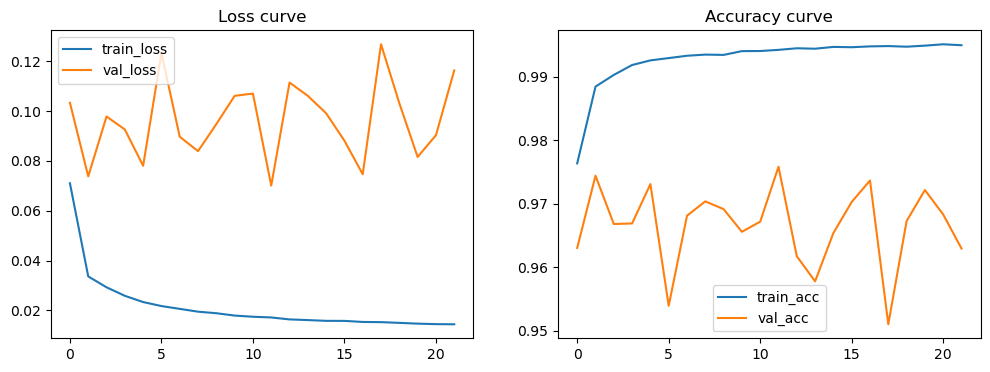

In [56]:
# Plot learning curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_mlp.history['loss'], label='train_loss')
plt.plot(history_mlp.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss curve')

plt.subplot(1,2,2)
plt.plot(history_mlp.history['accuracy'], label='train_acc')
plt.plot(history_mlp.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy curve')
plt.show()



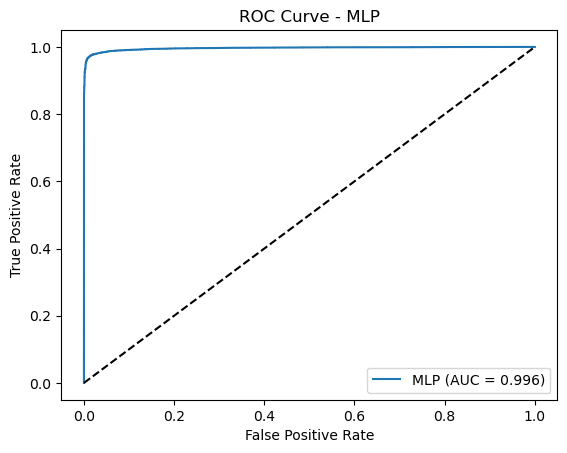

In [57]:
# ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {metrics_mlp["auc"]:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curve - MLP')
plt.legend(); plt.show()


# Check For Over Fitting

In [58]:
final_train_acc = history_mlp.history['accuracy'][-1]
final_val_acc = history_mlp.history['val_accuracy'][-1]
if (final_train_acc  - final_val_acc) > 0.05 and (val_loss > train_loss):
    print("Possible overfitting detected!")
    print(f"Train Accuracy: {final_train_acc:.4f}, Val Accuracy: {final_val_acc:.4f}")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
else:
    print("Model seems well-generalized (no major overfitting).")
    print(f"Train Accuracy: {final_train_acc:.4f}, Val Accuracy: {final_val_acc :.4f}")

Model seems well-generalized (no major overfitting).
Train Accuracy: 0.9950, Val Accuracy: 0.9629


## Model comparison report

In [59]:
# Collect metrics into a dataframe for comparison
results = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForest', 'LSTM', 'MLP'],
    'Accuracy': [metrics_lr['accuracy'], metrics_rf['accuracy'], lstm_metrics['Accuracy'], metrics_mlp['accuracy']],
    'Precision': [metrics_lr['precision'], metrics_rf['precision'], lstm_metrics['Precision'], metrics_mlp['precision']],
    'Recall': [metrics_lr['recall'], metrics_rf['recall'], lstm_metrics['Recall'], metrics_mlp['recall']],
    'F1': [metrics_lr['f1'], metrics_rf['f1'],lstm_metrics['F1'], metrics_mlp['f1']],
    'AUC': [metrics_lr['auc'], metrics_rf['auc'], lstm_metrics['AUC'], metrics_mlp['auc']]
})
display(results)



,Model,Accuracy,Precision,Recall,F1,AUC
0,LogisticRegression,0.952534,0.968721,0.935422,0.951780,0.990020
1,RandomForest,0.988430,0.990716,0.986138,0.988421,0.999151
2,LSTM,0.998927,0.998941,0.999511,0.999226,0.999566
3,MLP,0.974771,0.995811,0.967676,0.981542,0.996292


In [60]:
# Simple recommendation logic (explain in markdown below)

best_by = results.sort_values('Accuracy', ascending=False).iloc[0]
print("Best model by Accuracy:", best_by['Model'])

best_by = results.sort_values('Precision', ascending=False).iloc[0]
print("Best model by Precision:", best_by['Model'])

best_by = results.sort_values('Recall', ascending=False).iloc[0]
print("Best model by Recall_Value:", best_by['Model'])

best_by = results.sort_values('F1', ascending=False).iloc[0]
print("Best model by F1-score:", best_by['Model'])

best_by = results.sort_values('AUC', ascending=False).iloc[0]
print("Best model by AUC:", best_by['Model'])

Best model by Accuracy: LSTM
Best model by Precision: LSTM
Best model by Recall_Value: LSTM
Best model by F1-score: LSTM
Best model by AUC: LSTM


# Checking With New Data To Verify model

In [61]:
data = {
    'acceleration_x': [0.12, 0.15, 0.18, 0.11, 0.20, 0.25, 0.28, 0.22, 0.26, 0.30],
    'acceleration_y': [0.30, 0.28, 0.33, 0.31, 0.29, 0.35, 0.37, 0.34, 0.33, 0.36],
    'acceleration_z': [0.50, 0.48, 0.55, 0.49, 0.52, 0.56, 0.58, 0.54, 0.53, 0.57],
    'gyro_x':         [0.05, 0.06, 0.04, 0.07, 0.05, 0.06, 0.05, 0.04, 0.06, 0.05],
    'gyro_y':         [0.10, 0.09, 0.12, 0.11, 0.10, 0.11, 0.12, 0.10, 0.11, 0.09],
    'gyro_z':         [0.08, 0.07, 0.09, 0.08, 0.07, 0.09, 0.08, 0.07, 0.09, 0.08],
}
df = pd.DataFrame(data)

# ---- compute magnitude features (same as training) ----
df['accel_mag'] = np.sqrt(df['acceleration_x']**2 + df['acceleration_y']**2 + df['acceleration_z']**2)
df['gyro_mag']  = np.sqrt(df['gyro_x']**2 + df['gyro_y']**2 + df['gyro_z']**2)

# ---- feature order must match training ----
feature_cols = ['acceleration_x','acceleration_y','acceleration_z',
                'gyro_x','gyro_y','gyro_z','accel_mag','gyro_mag']

X_new = df[feature_cols].values
X_new_scaled = scaler.transform(X_new)

sequence_length = 10  # must match training

def build_sequences(X_scaled, seq_len):
    """Return array of shape (n_windows, seq_len, n_features)."""
    n = X_scaled.shape[0]
    if n >= seq_len:
        # produce sliding windows: start indices 0 .. n-seq_len
        windows = np.stack([X_scaled[i:i+seq_len] for i in range(n - seq_len + 1)])
    else:
        # pad by repeating the first row (you can change to zeros if you prefer)
        pad_n = seq_len - n
        pad = np.repeat(X_scaled[0:1, :], pad_n, axis=0)
        padded = np.vstack([pad, X_scaled])
        windows = np.expand_dims(padded, axis=0)  # single window
    return windows

windows = build_sequences(X_new_scaled, sequence_length)
# windows.shape -> (num_windows, sequence_length, num_features)

# ---- predict ----
probs = lstm.predict(windows).ravel()
preds = (probs >= 0.5).astype(int)


labels = {0: "WALKING", 1: "RUNNING"}
for i, (p, c) in enumerate(zip(probs, preds)):
    start_row = i
    end_row = i + sequence_length - 1
    print(f"Window {i+1} (rows {start_row}–{end_row}): prob={p:.3f} -> {labels[c]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Window 1 (rows 0–9): prob=1.000 -> RUNNING


# Save final artifacts

In [71]:
import os
import joblib

# Get current working directory (e.g., you are in D:\Projects\4. Walk run\data)
current_dir = os.getcwd()

# Go one folder up (to the project root)
project_root = os.path.dirname(current_dir)

# Define the save directory relative to the project root
save_dir = os.path.join(project_root, "output models")

# Create folder if it doesn’t exist
os.makedirs(save_dir, exist_ok=True)

# Save models
joblib.dump(scaler, os.path.join(save_dir, "scaler.joblib"))
joblib.dump(rf_clf, os.path.join(save_dir, "random_forest.joblib"))
mlp.save(os.path.join(save_dir, "mlp_model.h5"))
lstm.save(os.path.join(save_dir, "LSTM_Model.h5"))

print(f"All models saved in: {os.path.abspath(save_dir)}")


All models saved in: D:\Projects\4. Walk run\output models
